# Chapter 6: Decision Trees

## 1. Tree Basics and Classification

### 1.1 Tree Model

In [4]:
# Libraries
import numpy as np
import pandas as pd
import os

# Plotting
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize = 14)
mpl.rc('xtick', labelsize = 12)
mpl.rc('ytick', labelsize = 12)

In [2]:
# Load the dataset

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target # multiclass target

In [3]:
# Train the tree

tree_clf = DecisionTreeClassifier(max_depth = 2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

### 1.2 Visualization

#### 1.2.1 Plot the tree

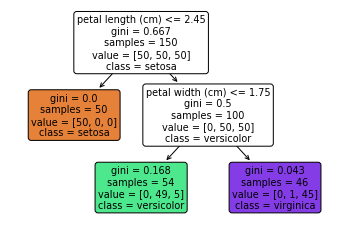

In [18]:
# Visualize the tree

from sklearn.tree import plot_tree

_ = plot_tree(tree_clf,
                   feature_names = iris.feature_names[2:],
                   class_names = iris.target_names,
                   rounded = True,
                   filled = True)

#### 1.2.2 Plot decision boundaries

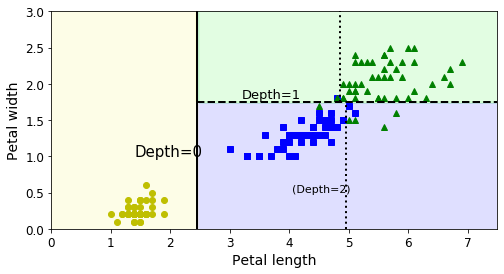

In [19]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.show()

### 1.3 Prediction

In [20]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [21]:
tree_clf.predict([[5, 1.5]])

array([1])

### 1.4 Scikit-Learn Tree Regularization Hyperparameters

- `min_samples_split` : minimum number of samples a node must have before it can be split
- `min_samples_leaf` : minimum number of samples a leaf node must have
- `min_weight_fraction_leaf` : same as `min_samples_leaf`, but expresses as fraction of total weighted instances
- `max_leaf_nodes`: max number of leaf nodes
- `max_features` : max features evaluated for splitting at each node

__Summary__ : to regularize, can:
   1. Increase `min_*` hyperparams
   2. Decrease `max_*` hyperparams
   
Alternatively, can use base tree procedure of pruning!

#### 1.4.1 Tree instability

Consider removing the widest versicolor flower

In [22]:
X[(X[:, 1]==X[:, 1][y==1].max()) & (y==1)] # widest Iris versicolor flower

array([[4.8, 1.8]])

In [23]:
# Fit a new model without this point

not_widest_versicolor = (X[:, 1]!=1.8) | (y==2)
X_tweaked = X[not_widest_versicolor]
y_tweaked = y[not_widest_versicolor]

tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)

DecisionTreeClassifier(max_depth=2, random_state=40)

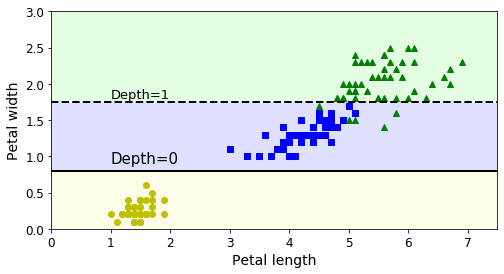

In [24]:
# Plot the new classification

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)

plt.show() # Big difference!

#### 1.4.2 Impact on the moons dataset

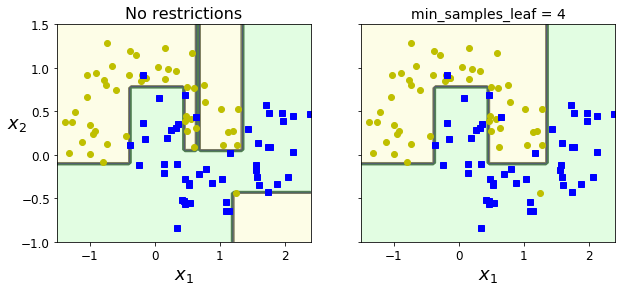

In [25]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)
plt.ylabel("")

plt.show()

#### 1.4.3 Tree sensitivity to rotation

Trees love boundaries orthogonal to the predictor axes -- have a much harder time with diagonal axes!

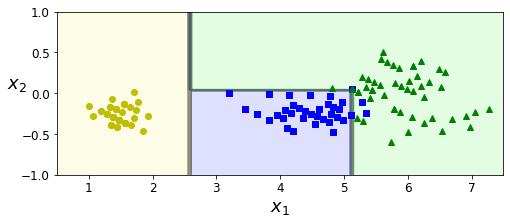

In [26]:
# Moons dataset

angle = np.pi / 180 * 20
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xr = X.dot(rotation_matrix)

tree_clf_r = DecisionTreeClassifier(random_state=42)
tree_clf_r.fit(Xr, y)

plt.figure(figsize=(8, 3))
plot_decision_boundary(tree_clf_r, Xr, y, axes=[0.5, 7.5, -1.0, 1], iris=False)

plt.show()

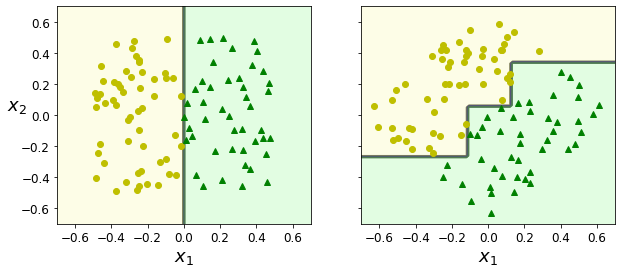

In [27]:
# Sample data that are perfectly separable

np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.sca(axes[1])
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.ylabel("")

plt.show()

## 2. Regression Trees

### 2.1 Basic Regression Tree

In [60]:
# Make quadratic training set w/noise

np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5)**2
y = y + np.random.rand(m, 1)/100

In [61]:
# Fit the regression tree

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth = 2, random_state = 42)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

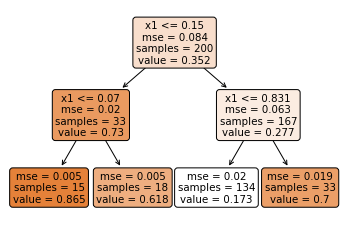

In [43]:
# Plot the tree

_ = plot_tree(tree_reg,
              feature_names = ["x1"],
              rounded = True,
              filled = True)

### 2.2 Plot Tree Piecewise Fit to Data

In [62]:
# Fit two trees of increasing depth

tree_reg1 = DecisionTreeRegressor(random_state = 42, max_depth = 2)
tree_reg2 = DecisionTreeRegressor(random_state = 42, max_depth = 3)

tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [63]:
# Make function to plot the predictions

def plot_regression_predictions(tree_reg, X, y, axes = [0, 1, -0.2, 1], ylabel = "$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize = 18)
    if ylabel:
        plt.ylabel(ylabel, fontsize = 18, rotation = 0)
    plt.plot(X, y, "b.") # the original data
    plt.plot(x1, y_pred, "r.-", linewidth = 2, label = r"$\hat{y}$")

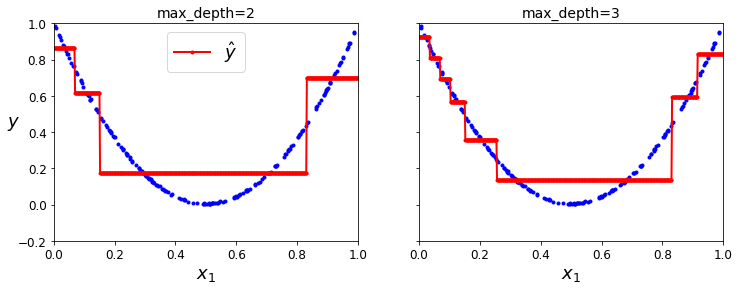

In [64]:
# Make the plot

fig, axes = plt.subplots(ncols=2, figsize=(12, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg1, X, y)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.sca(axes[1])
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
plt.title("max_depth=3", fontsize=14)

plt.show()

### 2.3 Leaf Minimum Samples Regularization

In [65]:
# Make new fits

tree_reg1 = DecisionTreeRegressor(random_state = 42) # no restriction
tree_reg2 = DecisionTreeRegressor(random_state = 42, min_samples_leaf = 10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

DecisionTreeRegressor(min_samples_leaf=10, random_state=42)

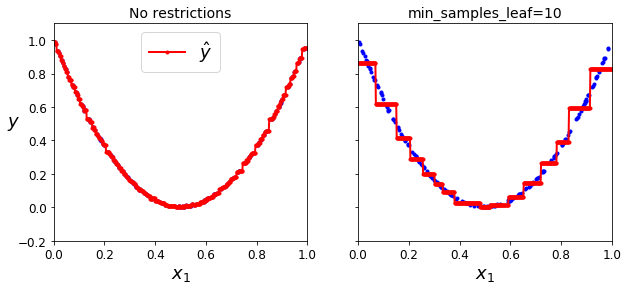

In [66]:
# Plot the results

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.sca(axes[1])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

plt.show()